In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Following pointers will be helpful to structure your findings.   

1.	Try and explore the data to check for missing values/erroneous entries and also comment on redundant features and add additional ones, if needed.

2.	It is immediately apparent that some of the column names have typos, so let us clear them up before continuing further, so that we don't have to use alternate spellings every time we need a variable. 

3.	For convenience, convert the AppointmentRegistration and Appointment columns into datetime64 format and the AwaitingTime column into absolute values.

4.	Create a new feature called HourOfTheDay, which will indicate the hour of the day at which the appointment was booked. 

5.	Identify and remove outliers from Age. Explain using an appropriate plot.

6.	Analyse the probability of showing up with respect to different features. Create scatter plot and trend lines to analyse the relation between probability of showing up with respect to age/Houroftheday/awaitingtime. Describe your finding.

7.	Create a bar graph to depict probability of showing up for diabetes, alcoholism, hypertension, TB, smokes, scholarship.

8.	Create separate bar graphs to show the probability of showing up for male and female, day of the week and sms reminder. Describe your interpretation. 

9.	Predict the Show-Up/No-Show status based on the features which show the most variation in probability of showing up. They are:

	Age
	Diabetes
	Alchoholism
	Hypertension
	Smokes
	Scholarship
	Tuberculosis


In [2]:
df=pd.read_csv("train-Healthcare.csv")

In [3]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      210000 non-null  int64 
 1   Gender                   210000 non-null  object
 2   AppointmentRegistration  210000 non-null  object
 3   ApointmentData           210000 non-null  object
 4   DayOfTheWeek             210000 non-null  object
 5   Status                   210000 non-null  object
 6   Diabetes                 210000 non-null  int64 
 7   Alcoolism                210000 non-null  int64 
 8   HiperTension             210000 non-null  int64 
 9   Handcap                  210000 non-null  int64 
 10  Smokes                   210000 non-null  int64 
 11  Scholarship              210000 non-null  int64 
 12  Tuberculosis             210000 non-null  int64 
 13  Sms_Reminder             210000 non-null  int64 
 14  AwaitingTime        

In [5]:
#df['Gender']=df['Gender'].str.replace('Male','Female',[1,0])

In [6]:
from prettytable import PrettyTable
unique=PrettyTable()
unique.field_names=['feature','unique']
for i in df.columns:
    count=df[i].nunique()
    unique.add_row([i,count])
print(unique)

+-------------------------+--------+
|         feature         | unique |
+-------------------------+--------+
|           Age           |  107   |
|          Gender         |   2    |
| AppointmentRegistration | 207711 |
|      ApointmentData     |  533   |
|       DayOfTheWeek      |   7    |
|          Status         |   2    |
|         Diabetes        |   2    |
|        Alcoolism        |   2    |
|       HiperTension      |   2    |
|         Handcap         |   5    |
|          Smokes         |   2    |
|       Scholarship       |   2    |
|       Tuberculosis      |   2    |
|       Sms_Reminder      |   3    |
|       AwaitingTime      |  205   |
+-------------------------+--------+


In [7]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


In [8]:
gender_map = {'M': 0, 'F': 1}

In [9]:
df['Gender'] = [gender_map[gender] for gender in df['Gender']]

In [10]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,1,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,1,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,0,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,1,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


In [11]:
day_map={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

In [12]:
df['DayOfTheWeek'].unique()

array(['Friday', 'Thursday', 'Tuesday', 'Monday', 'Wednesday', 'Saturday',
       'Sunday'], dtype=object)

In [13]:
df['DayOfTheWeek']=[day_map[day] for day in df['DayOfTheWeek']]

In [14]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,5,No-Show,0,0,0,0,1,0,0,0,-3
1,56,1,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,4,No-Show,1,0,1,0,0,0,0,1,-17
2,27,1,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,0,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,1,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,4,Show-Up,0,0,0,0,0,0,0,1,-23


In [15]:
status_map = {'No-Show': 0, 'Show-Up': 1}

In [16]:
df['Status'].unique()

array(['No-Show', 'Show-Up'], dtype=object)

In [17]:
df['Status']=[status_map[status] for status in df['Status']]

In [18]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,5,0,0,0,0,0,1,0,0,0,-3
1,56,1,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,4,0,1,0,1,0,0,0,0,1,-17
2,27,1,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,2,1,0,0,0,0,0,0,0,0,-21
3,24,0,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,2,1,0,0,0,0,0,0,0,0,-34
4,48,1,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,4,1,0,0,0,0,0,0,0,1,-23


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      210000 non-null  int64 
 1   Gender                   210000 non-null  int64 
 2   AppointmentRegistration  210000 non-null  object
 3   ApointmentData           210000 non-null  object
 4   DayOfTheWeek             210000 non-null  int64 
 5   Status                   210000 non-null  int64 
 6   Diabetes                 210000 non-null  int64 
 7   Alcoolism                210000 non-null  int64 
 8   HiperTension             210000 non-null  int64 
 9   Handcap                  210000 non-null  int64 
 10  Smokes                   210000 non-null  int64 
 11  Scholarship              210000 non-null  int64 
 12  Tuberculosis             210000 non-null  int64 
 13  Sms_Reminder             210000 non-null  int64 
 14  AwaitingTime        

In [20]:
df['AwaitingTime']= abs(df['AwaitingTime'])

In [21]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,5,0,0,0,0,0,1,0,0,0,3
1,56,1,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,4,0,1,0,1,0,0,0,0,1,17
2,27,1,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,2,1,0,0,0,0,0,0,0,0,21
3,24,0,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,2,1,0,0,0,0,0,0,0,0,34
4,48,1,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,4,1,0,0,0,0,0,0,0,1,23


In [22]:
df['AppointmentRegistration'].nunique()

207711

<AxesSubplot:ylabel='Status'>

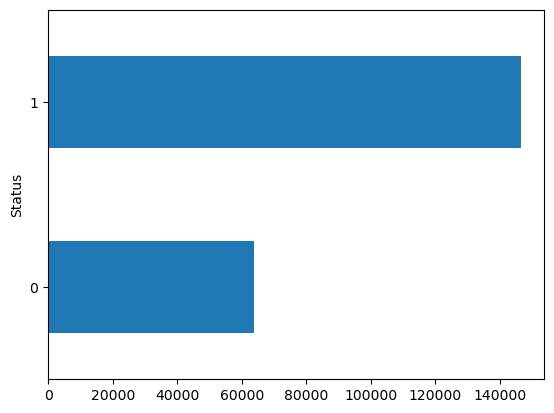

In [23]:
df.groupby(['Status'])['AwaitingTime'].count().plot(kind='barh')

In [24]:
xx=df['Status']
yy=df['AwaitingTime']

<AxesSubplot:xlabel='Status', ylabel='AwaitingTime'>

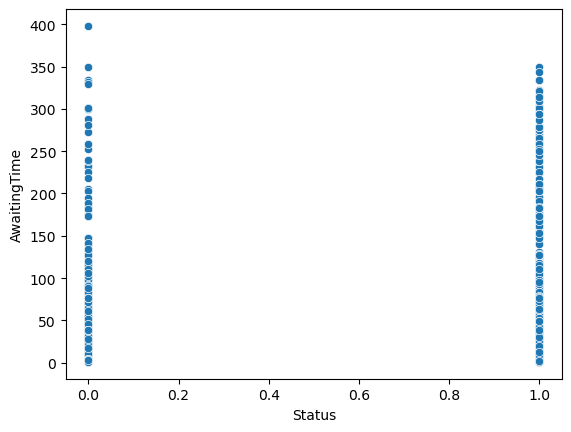

In [25]:
sns.scatterplot(xx,yy,data=df)

In [27]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,5,0,0,0,0,0,1,0,0,0,3
1,56,1,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,4,0,1,0,1,0,0,0,0,1,17
2,27,1,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,2,1,0,0,0,0,0,0,0,0,21
3,24,0,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,2,1,0,0,0,0,0,0,0,0,34
4,48,1,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,4,1,0,0,0,0,0,0,0,1,23


In [28]:
#df.groupby(['Gender','AwaitingTime'])['Status'].plot(kind='barh')

In [29]:
print(unique)

+-------------------------+--------+
|         feature         | unique |
+-------------------------+--------+
|           Age           |  107   |
|          Gender         |   2    |
| AppointmentRegistration | 207711 |
|      ApointmentData     |  533   |
|       DayOfTheWeek      |   7    |
|          Status         |   2    |
|         Diabetes        |   2    |
|        Alcoolism        |   2    |
|       HiperTension      |   2    |
|         Handcap         |   5    |
|          Smokes         |   2    |
|       Scholarship       |   2    |
|       Tuberculosis      |   2    |
|       Sms_Reminder      |   3    |
|       AwaitingTime      |  205   |
+-------------------------+--------+


In [30]:
df.shape

(210000, 15)

In [31]:
df.isnull().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

In [32]:
df[df.duplicated()]

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
4273,36,0,2015-06-15T13:05:16Z,2015-06-22T00:00:00Z,1,0,0,0,0,0,0,0,0,0,7
11896,3,0,2015-10-14T11:09:05Z,2015-10-15T00:00:00Z,4,0,0,0,0,0,0,0,0,0,1
22281,14,1,2013-12-03T17:03:05Z,2014-01-07T00:00:00Z,2,1,0,0,0,0,0,0,0,0,35
29650,29,1,2014-04-30T10:58:50Z,2014-05-02T00:00:00Z,5,0,0,0,0,0,0,0,0,0,2
34156,85,1,2014-06-09T17:11:07Z,2014-06-10T00:00:00Z,2,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205321,27,1,2015-05-19T08:12:46Z,2015-05-20T00:00:00Z,3,1,0,0,0,0,0,0,0,0,1
205575,7,1,2014-01-07T09:24:58Z,2014-02-11T00:00:00Z,2,1,0,0,0,0,0,0,0,1,35
206023,56,0,2014-11-20T10:15:42Z,2014-11-25T00:00:00Z,2,1,0,0,1,1,0,0,0,0,5
207986,8,1,2014-04-14T10:46:00Z,2014-04-16T00:00:00Z,3,1,0,0,0,0,0,0,0,0,2


In [33]:
df.shape

(210000, 15)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(209833, 15)

In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(209833, 15)

In [38]:
df[df.duplicated()]

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime


In [39]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,5,0,0,0,0,0,1,0,0,0,3
1,56,1,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,4,0,1,0,1,0,0,0,0,1,17
2,27,1,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,2,1,0,0,0,0,0,0,0,0,21
3,24,0,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,2,1,0,0,0,0,0,0,0,0,34
4,48,1,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,4,1,0,0,0,0,0,0,0,1,23


In [40]:
df.groupby(['Gender'])['Status'].count()

Gender
0     69574
1    140259
Name: Status, dtype: int64

In [41]:
df['ApointmentData']=pd.to_datetime(df['ApointmentData'])

In [42]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20T08:33:56Z,2015-10-23 00:00:00+00:00,5,0,0,0,0,0,1,0,0,0,3
1,56,1,2014-02-03T10:05:26Z,2014-02-20 00:00:00+00:00,4,0,1,0,1,0,0,0,0,1,17
2,27,1,2014-04-29T07:57:32Z,2014-05-20 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,21
3,24,0,2014-04-02T13:53:37Z,2014-05-06 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,34
4,48,1,2014-01-07T10:07:17Z,2014-01-30 00:00:00+00:00,4,1,0,0,0,0,0,0,0,1,23


In [43]:
df['AppointmentRegistration']=pd.to_datetime(df['AppointmentRegistration'])

In [44]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20 08:33:56+00:00,2015-10-23 00:00:00+00:00,5,0,0,0,0,0,1,0,0,0,3
1,56,1,2014-02-03 10:05:26+00:00,2014-02-20 00:00:00+00:00,4,0,1,0,1,0,0,0,0,1,17
2,27,1,2014-04-29 07:57:32+00:00,2014-05-20 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,21
3,24,0,2014-04-02 13:53:37+00:00,2014-05-06 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,34
4,48,1,2014-01-07 10:07:17+00:00,2014-01-30 00:00:00+00:00,4,1,0,0,0,0,0,0,0,1,23


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209833 entries, 0 to 209999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Age                      209833 non-null  int64              
 1   Gender                   209833 non-null  int64              
 2   AppointmentRegistration  209833 non-null  datetime64[ns, UTC]
 3   ApointmentData           209833 non-null  datetime64[ns, UTC]
 4   DayOfTheWeek             209833 non-null  int64              
 5   Status                   209833 non-null  int64              
 6   Diabetes                 209833 non-null  int64              
 7   Alcoolism                209833 non-null  int64              
 8   HiperTension             209833 non-null  int64              
 9   Handcap                  209833 non-null  int64              
 10  Smokes                   209833 non-null  int64              
 11  Scholarship  

In [46]:
#df['Houroftheday']=[hour for hour in df['ApointmentData'][9:10]]

In [47]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20 08:33:56+00:00,2015-10-23 00:00:00+00:00,5,0,0,0,0,0,1,0,0,0,3
1,56,1,2014-02-03 10:05:26+00:00,2014-02-20 00:00:00+00:00,4,0,1,0,1,0,0,0,0,1,17
2,27,1,2014-04-29 07:57:32+00:00,2014-05-20 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,21
3,24,0,2014-04-02 13:53:37+00:00,2014-05-06 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,34
4,48,1,2014-01-07 10:07:17+00:00,2014-01-30 00:00:00+00:00,4,1,0,0,0,0,0,0,0,1,23


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209833 entries, 0 to 209999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Age                      209833 non-null  int64              
 1   Gender                   209833 non-null  int64              
 2   AppointmentRegistration  209833 non-null  datetime64[ns, UTC]
 3   ApointmentData           209833 non-null  datetime64[ns, UTC]
 4   DayOfTheWeek             209833 non-null  int64              
 5   Status                   209833 non-null  int64              
 6   Diabetes                 209833 non-null  int64              
 7   Alcoolism                209833 non-null  int64              
 8   HiperTension             209833 non-null  int64              
 9   Handcap                  209833 non-null  int64              
 10  Smokes                   209833 non-null  int64              
 11  Scholarship  

In [49]:
df.tail()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
209995,53,1,2015-04-06 10:49:44+00:00,2015-04-07 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,1
209996,20,1,2015-04-09 12:54:38+00:00,2015-04-10 00:00:00+00:00,5,1,0,0,1,0,0,0,0,0,1
209997,59,1,2014-07-22 15:20:48+00:00,2014-07-31 00:00:00+00:00,4,1,0,0,0,0,0,0,0,1,9
209998,9,0,2014-05-14 08:26:00+00:00,2014-05-27 00:00:00+00:00,2,1,0,0,0,0,0,1,0,1,13
209999,64,1,2014-04-07 15:08:51+00:00,2014-04-09 00:00:00+00:00,3,1,1,0,1,0,0,0,0,0,2


In [50]:
from datetime import datetime

In [51]:
#df['Houroftheday'] = df['AppointmentRegistration'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S%z'))

In [52]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,1,2015-10-20 08:33:56+00:00,2015-10-23 00:00:00+00:00,5,0,0,0,0,0,1,0,0,0,3
1,56,1,2014-02-03 10:05:26+00:00,2014-02-20 00:00:00+00:00,4,0,1,0,1,0,0,0,0,1,17
2,27,1,2014-04-29 07:57:32+00:00,2014-05-20 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,21
3,24,0,2014-04-02 13:53:37+00:00,2014-05-06 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,34
4,48,1,2014-01-07 10:07:17+00:00,2014-01-30 00:00:00+00:00,4,1,0,0,0,0,0,0,0,1,23


In [53]:
df['HourOfTheDay']=[hour for hour in df['AppointmentRegistration']]

In [54]:
df['AppointmentRegistration']

0        2015-10-20 08:33:56+00:00
1        2014-02-03 10:05:26+00:00
2        2014-04-29 07:57:32+00:00
3        2014-04-02 13:53:37+00:00
4        2014-01-07 10:07:17+00:00
                    ...           
209995   2015-04-06 10:49:44+00:00
209996   2015-04-09 12:54:38+00:00
209997   2014-07-22 15:20:48+00:00
209998   2014-05-14 08:26:00+00:00
209999   2014-04-07 15:08:51+00:00
Name: AppointmentRegistration, Length: 209833, dtype: datetime64[ns, UTC]

In [55]:
df['HourOfTheDay'] = df['AppointmentRegistration'].apply(lambda x: x.strftime('%H:%M:%S'))

In [56]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourOfTheDay
0,38,1,2015-10-20 08:33:56+00:00,2015-10-23 00:00:00+00:00,5,0,0,0,0,0,1,0,0,0,3,08:33:56
1,56,1,2014-02-03 10:05:26+00:00,2014-02-20 00:00:00+00:00,4,0,1,0,1,0,0,0,0,1,17,10:05:26
2,27,1,2014-04-29 07:57:32+00:00,2014-05-20 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,21,07:57:32
3,24,0,2014-04-02 13:53:37+00:00,2014-05-06 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,34,13:53:37
4,48,1,2014-01-07 10:07:17+00:00,2014-01-30 00:00:00+00:00,4,1,0,0,0,0,0,0,0,1,23,10:07:17


<AxesSubplot:xlabel='Age'>

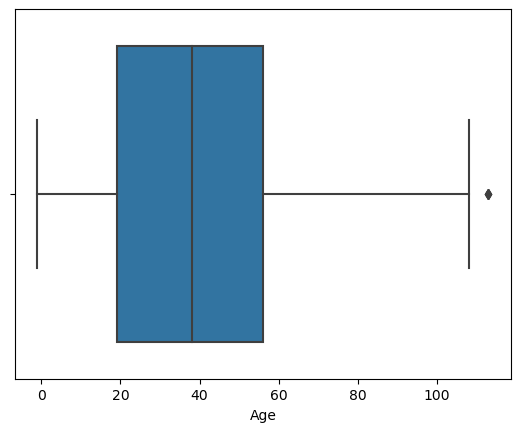

In [57]:
sns.boxplot(df['Age'])

In [58]:
df['Age'].max()

113

In [59]:
df.describe()

,Age,Gender,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000,209833.000000
mean,37.766305,0.668432,2.960631,0.696964,0.077309,0.024662,0.214904,0.020450,0.052022,0.097754,0.000429,0.574671,13.835579
std,22.794242,0.470778,1.394015,0.459572,0.267082,0.155095,0.410757,0.155645,0.222073,0.296982,0.020706,0.499715,15.685686
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,38.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,56.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,113.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,398.000000


In [60]:
df = df[df['Age'] <= 100]

In [61]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,HourOfTheDay
0,38,1,2015-10-20 08:33:56+00:00,2015-10-23 00:00:00+00:00,5,0,0,0,0,0,1,0,0,0,3,08:33:56
1,56,1,2014-02-03 10:05:26+00:00,2014-02-20 00:00:00+00:00,4,0,1,0,1,0,0,0,0,1,17,10:05:26
2,27,1,2014-04-29 07:57:32+00:00,2014-05-20 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,21,07:57:32
3,24,0,2014-04-02 13:53:37+00:00,2014-05-06 00:00:00+00:00,2,1,0,0,0,0,0,0,0,0,34,13:53:37
4,48,1,2014-01-07 10:07:17+00:00,2014-01-30 00:00:00+00:00,4,1,0,0,0,0,0,0,0,1,23,10:07:17


<AxesSubplot:xlabel='Age'>

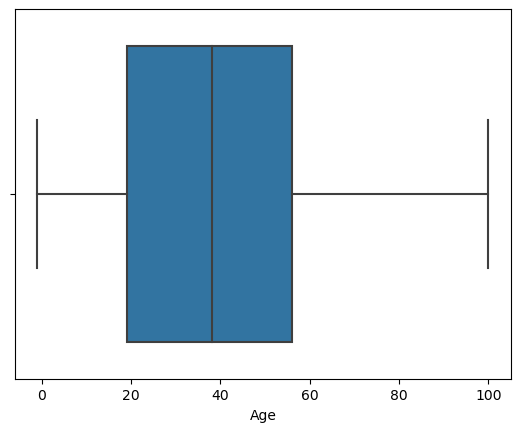

In [62]:
sns.boxplot(df['Age'])

In [63]:
h=df['HourOfTheDay']
A=df['AwaitingTime']

In [64]:
#sns.scatterplot(x=h,y=A,data=df,hue=df['Gender'])

In [65]:
df['AwaitingTime'].nunique()

205

<AxesSubplot:xlabel='AwaitingTime'>

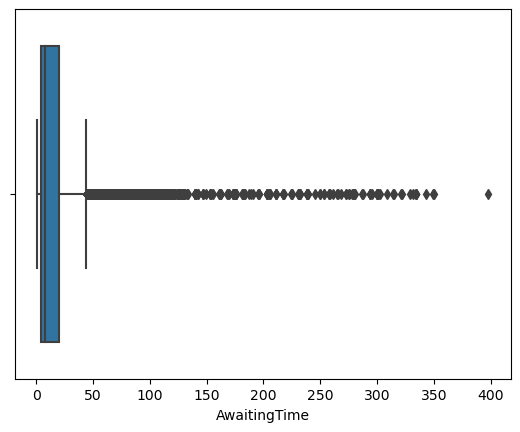

In [66]:
sns.boxplot(df['AwaitingTime'])

In [67]:
#df = df[df['AwaitingTime'] <= 40]

<AxesSubplot:xlabel='AwaitingTime'>

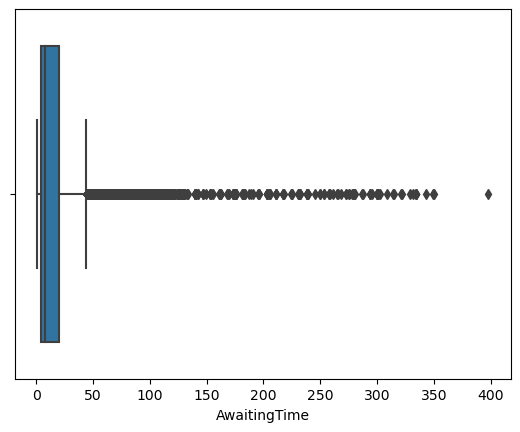

In [68]:
sns.boxplot(df['AwaitingTime'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209813 entries, 0 to 209999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   Age                      209813 non-null  int64              
 1   Gender                   209813 non-null  int64              
 2   AppointmentRegistration  209813 non-null  datetime64[ns, UTC]
 3   ApointmentData           209813 non-null  datetime64[ns, UTC]
 4   DayOfTheWeek             209813 non-null  int64              
 5   Status                   209813 non-null  int64              
 6   Diabetes                 209813 non-null  int64              
 7   Alcoolism                209813 non-null  int64              
 8   HiperTension             209813 non-null  int64              
 9   Handcap                  209813 non-null  int64              
 10  Smokes                   209813 non-null  int64              
 11  Scholarship  

In [71]:
X=df.drop(columns=['AppointmentRegistration','ApointmentData','DayOfTheWeek','Status','Handcap','Sms_Reminder','AwaitingTime','HourOfTheDay'])

In [72]:
Y=df['Status']

In [83]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
#from lazypredict.Supervised import LazyClassifier

In [77]:
model_l=LogisticRegression()
model_S=SGDClassifier()

In [78]:
model_l.fit(X_train,y_train)

LogisticRegression()

In [79]:
model_S.fit(X_train,y_train)

SGDClassifier()

In [84]:
classification_model=[]
classification_model.append(('Logistic Regression',LogisticRegression()))
classification_model.append(('SGD Classifier',SGDClassifier()))
classification_model.append(('Decesion tree',DecisionTreeClassifier()))
classification_model.append(('Random Forest',RandomForestClassifier()))
Score=[]
for name,model in classification_model:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    print(f'for algo{name}={score}')

for algoLogistic Regression=0.6962562257226604
for algoSGD Classifier=0.6960655815837762
for algoDecesion tree=0.6929437838095465
for algoRandom Forest=0.6935872077782809
